# Pandas Style examples

Starting with `itables>=1.6.0`, ITables provides support for
[Pandas Style](https://pandas.pydata.org/docs/user_guide/style.html).


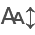

In [1]:
import numpy as np
import pandas as pd

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [2]:
import itables.options as opt

opt.lengthMenu = [5, 10, 20, 50, 100, 200, 500]

This is the DataFrame that we are going to style:

In [3]:
x = np.linspace(0, np.pi, 21)
df = pd.DataFrame({"sin": np.sin(x), "cos": np.cos(x)}, index=pd.Index(x, name="alpha"))

df

sin           cos
alpha                               
0.000000  0.000000e+00  1.000000e+00
0.157080  1.564345e-01  9.876883e-01
0.314159  3.090170e-01  9.510565e-01
0.471239  4.539905e-01  8.910065e-01
0.628319  5.877853e-01  8.090170e-01
0.785398  7.071068e-01  7.071068e-01
0.942478  8.090170e-01  5.877853e-01
1.099557  8.910065e-01  4.539905e-01
1.256637  9.510565e-01  3.090170e-01
1.413717  9.876883e-01  1.564345e-01
1.570796  1.000000e+00  6.123234e-17
1.727876  9.876883e-01 -1.564345e-01
1.884956  9.510565e-01 -3.090170e-01
2.042035  8.910065e-01 -4.539905e-01
2.199115  8.090170e-01 -5.877853e-01
2.356194  7.071068e-01 -7.071068e-01
2.513274  5.877853e-01 -8.090170e-01
2.670354  4.539905e-01 -8.910065e-01
2.827433  3.090170e-01 -9.510565e-01
2.984513  1.564345e-01 -9.876883e-01
3.141593  1.224647e-16 -1.000000e+00

## Color

From now on we will display `df.style`
(a Pandas `Styler` object) rather than our DataFrame `df`.

Let's start with a background gradient:

In [4]:
s = df.style
s.background_gradient(axis=None, cmap="YlOrRd")

## Format

We can also choose how the data is formatted:

In [5]:
s.format("{:.3f}").format_index("{:.3f}")

## Caption

In [6]:
s.set_caption("A Pandas Styler object with background colors").set_table_styles(
    [{"selector": "caption", "props": "caption-side: bottom; font-size:1em;"}]
)

## Tooltips

In [7]:
ttips = pd.DataFrame(
    {
        "sin": ["The sinus of {:.6f} is {:.6f}".format(t, np.sin(t)) for t in x],
        "cos": ["The cosinus of {:.6f} is {:.6f}".format(t, np.cos(t)) for t in x],
    },
    index=df.index,
)
s.set_tooltips(ttips).set_caption("With tooltips")

```{note}
Unlike Pandas or Polar DataFrames, `Styler` objects are rendered directly using their
`to_html` method, rather than passing the underlying table data to the DataTables
library.

Because of this, the rendering of the table might differ slightly from the rendering of the
corresponding DataFrame. In particular,
- The downsampling is not available - please pay attention to the size of the table being rendered
- Sorting of numbers will not work if the column contains NaNs.
```